In [1]:
import numpy as np
import pandas as pd
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tensorflow as tf
from tensorflow import keras
import h5py
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# Load Model
from tensorflow.keras.models import load_model
trained_model = load_model(r'F:\Autonomous Driving\Lidardataset_trainning\trained_modelall')

In [41]:
import os
from os import listdir
import pickle

Lidar_test =[]
Lidar_test = pd.DataFrame(Lidar_test)

with open(r'F:\Autonomous Driving\Lidardataset\001\lidar\00.pkl', 'rb') as f:
     Lidar_test = pickle.load(f)

Lidar_test.pop('t')
Lidar_test.pop('d')

Lidar_test = np.array(Lidar_test)

print('Lidarpredict shape:', Lidar_test.shape)
print(Lidar_test)

Lidarpredict shape: (169171, 4)
[[-58.4571991  -61.26926804   2.88101435  39.        ]
 [-71.5721817  -74.84031677   1.27918303   9.        ]
 [-42.44283295 -44.35742569   0.42650267  56.        ]
 ...
 [ 41.09126505  11.59871921   5.40852274  20.        ]
 [ 34.50563012  24.58449691   5.67867862   3.        ]
 [ 41.03754546  11.6692476    5.39646771  20.        ]]


In [42]:
prediction = trained_model.predict_classes(Lidar_test)
print(prediction)
print(prediction.shape)

f:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[41 41 41 ...  5 41  5]
(169171,)


In [43]:
prediction = pd.DataFrame(prediction)

prediction.to_csv(r'C:\Users\12200\Desktop\22.csv')

In [44]:
label_test =[]
label_test= pd.DataFrame(label_test)

with open(r'F:\Autonomous Driving\Lidardataset\001\annotations\semseg\00.pkl', 'rb') as f:
    label_test = pickle.load(f)

label_test.to_csv(r'C:\Users\12200\Desktop\11.csv')
    
label_test  = np.array(label_test )
print('labels  shape:', label_test .shape)

labels  shape: (169171, 1)


In [45]:
test_loss, test_acc = trained_model.evaluate(Lidar_test, label_test)
print('Test accuracy:', test_acc)

5287/5287 [==============================] - 3s 599us/step - loss: 1.1497 - accuracy: 0.6460
Test accuracy: 0.6459854245185852


In [46]:
from sklearn.metrics import plot_confusion_matrix, make_scorer, accuracy_score
prediction = np.array(prediction)
ResultAccuracy = accuracy_score(prediction, label_test)
print("The Test Accuracy is" , ResultAccuracy)

The Test Accuracy is 0.6459854230334986


In [47]:
categories = ["Smoke", "Exhaust", "Spray or rain", "Reflection", "Vegetation","Ground", "Road", "Lane Line Marking","Stop Line Marking", "Other Road Marking", "Sidewalk", "Driveway", "Car", "Pickup Truck", "Medium-sized Truck", "Semi-truck", "Towed Object", "Motorcycle", "Other Vehicle - Construction Vehicle", "Other Vehicle - Uncommon", "Other Vehicle - Pedicab", "Emergency Vehicle", "Bus", "Personal Mobility Device", "Motorized Scooter", "Bicycle", "Train", "Trolley", "Tram / Subway",  "Pedestrian", "Pedestrian with Object",  "Animals - Bird",  "Animals - Other", "Pylons", "Road Barriers", "Signs", "Cones",  "Construction Signs", "Temporary Construction Barriers", "Rolling Containers", "Building", "Other Static Object"]

In [48]:
point_number=[]

for j in range (1, 43):
    account = 0
    for i in range (0,len(prediction)):
        a = j
        if a == prediction[i]:
            account+=1
    point_number.append(account) 

result =[]
result = pd.DataFrame(result)
categories = pd.DataFrame(categories)
point_number = pd.DataFrame(point_number)

result = pd.concat([categories, point_number],axis = 1, ignore_index=True)
result.columns =['Class', 'Number of points']

result.to_csv(r'C:\Users\12200\Desktop\33.csv')
print(result)

                                   Class  Number of points
0                                  Smoke                 0
1                                Exhaust                 0
2                          Spray or rain                 0
3                             Reflection               645
4                             Vegetation             24346
5                                 Ground              1305
6                                   Road             51221
7                      Lane Line Marking                 0
8                      Stop Line Marking                 0
9                     Other Road Marking                 8
10                              Sidewalk             12561
11                              Driveway                40
12                                   Car             21316
13                          Pickup Truck               581
14                    Medium-sized Truck                14
15                            Semi-truck                

In [49]:
Lidar_test = pd.DataFrame(Lidar_test)
prediction = pd.DataFrame(prediction)
plotdata = pd.concat([Lidar_test,prediction],axis = 1, ignore_index=True)
plotdata.columns =['x','y','z','i','Class']
plotdata

,x,y,z,i,Class
0,-58.457199,-61.269268,2.881014,39.0,41
1,-71.572182,-74.840317,1.279183,9.0,41
2,-42.442833,-44.357426,0.426503,56.0,41
3,-31.749357,-33.156342,-0.025245,3.0,42
4,-9.920758,-10.442794,1.010120,0.0,13
...,...,...,...,...,...
169166,41.139096,11.530556,5.419758,17.0,5
169167,34.511274,24.490057,5.673317,27.0,41
169168,41.091265,11.598719,5.408523,20.0,5
169169,34.505630,24.584497,5.678679,3.0,41


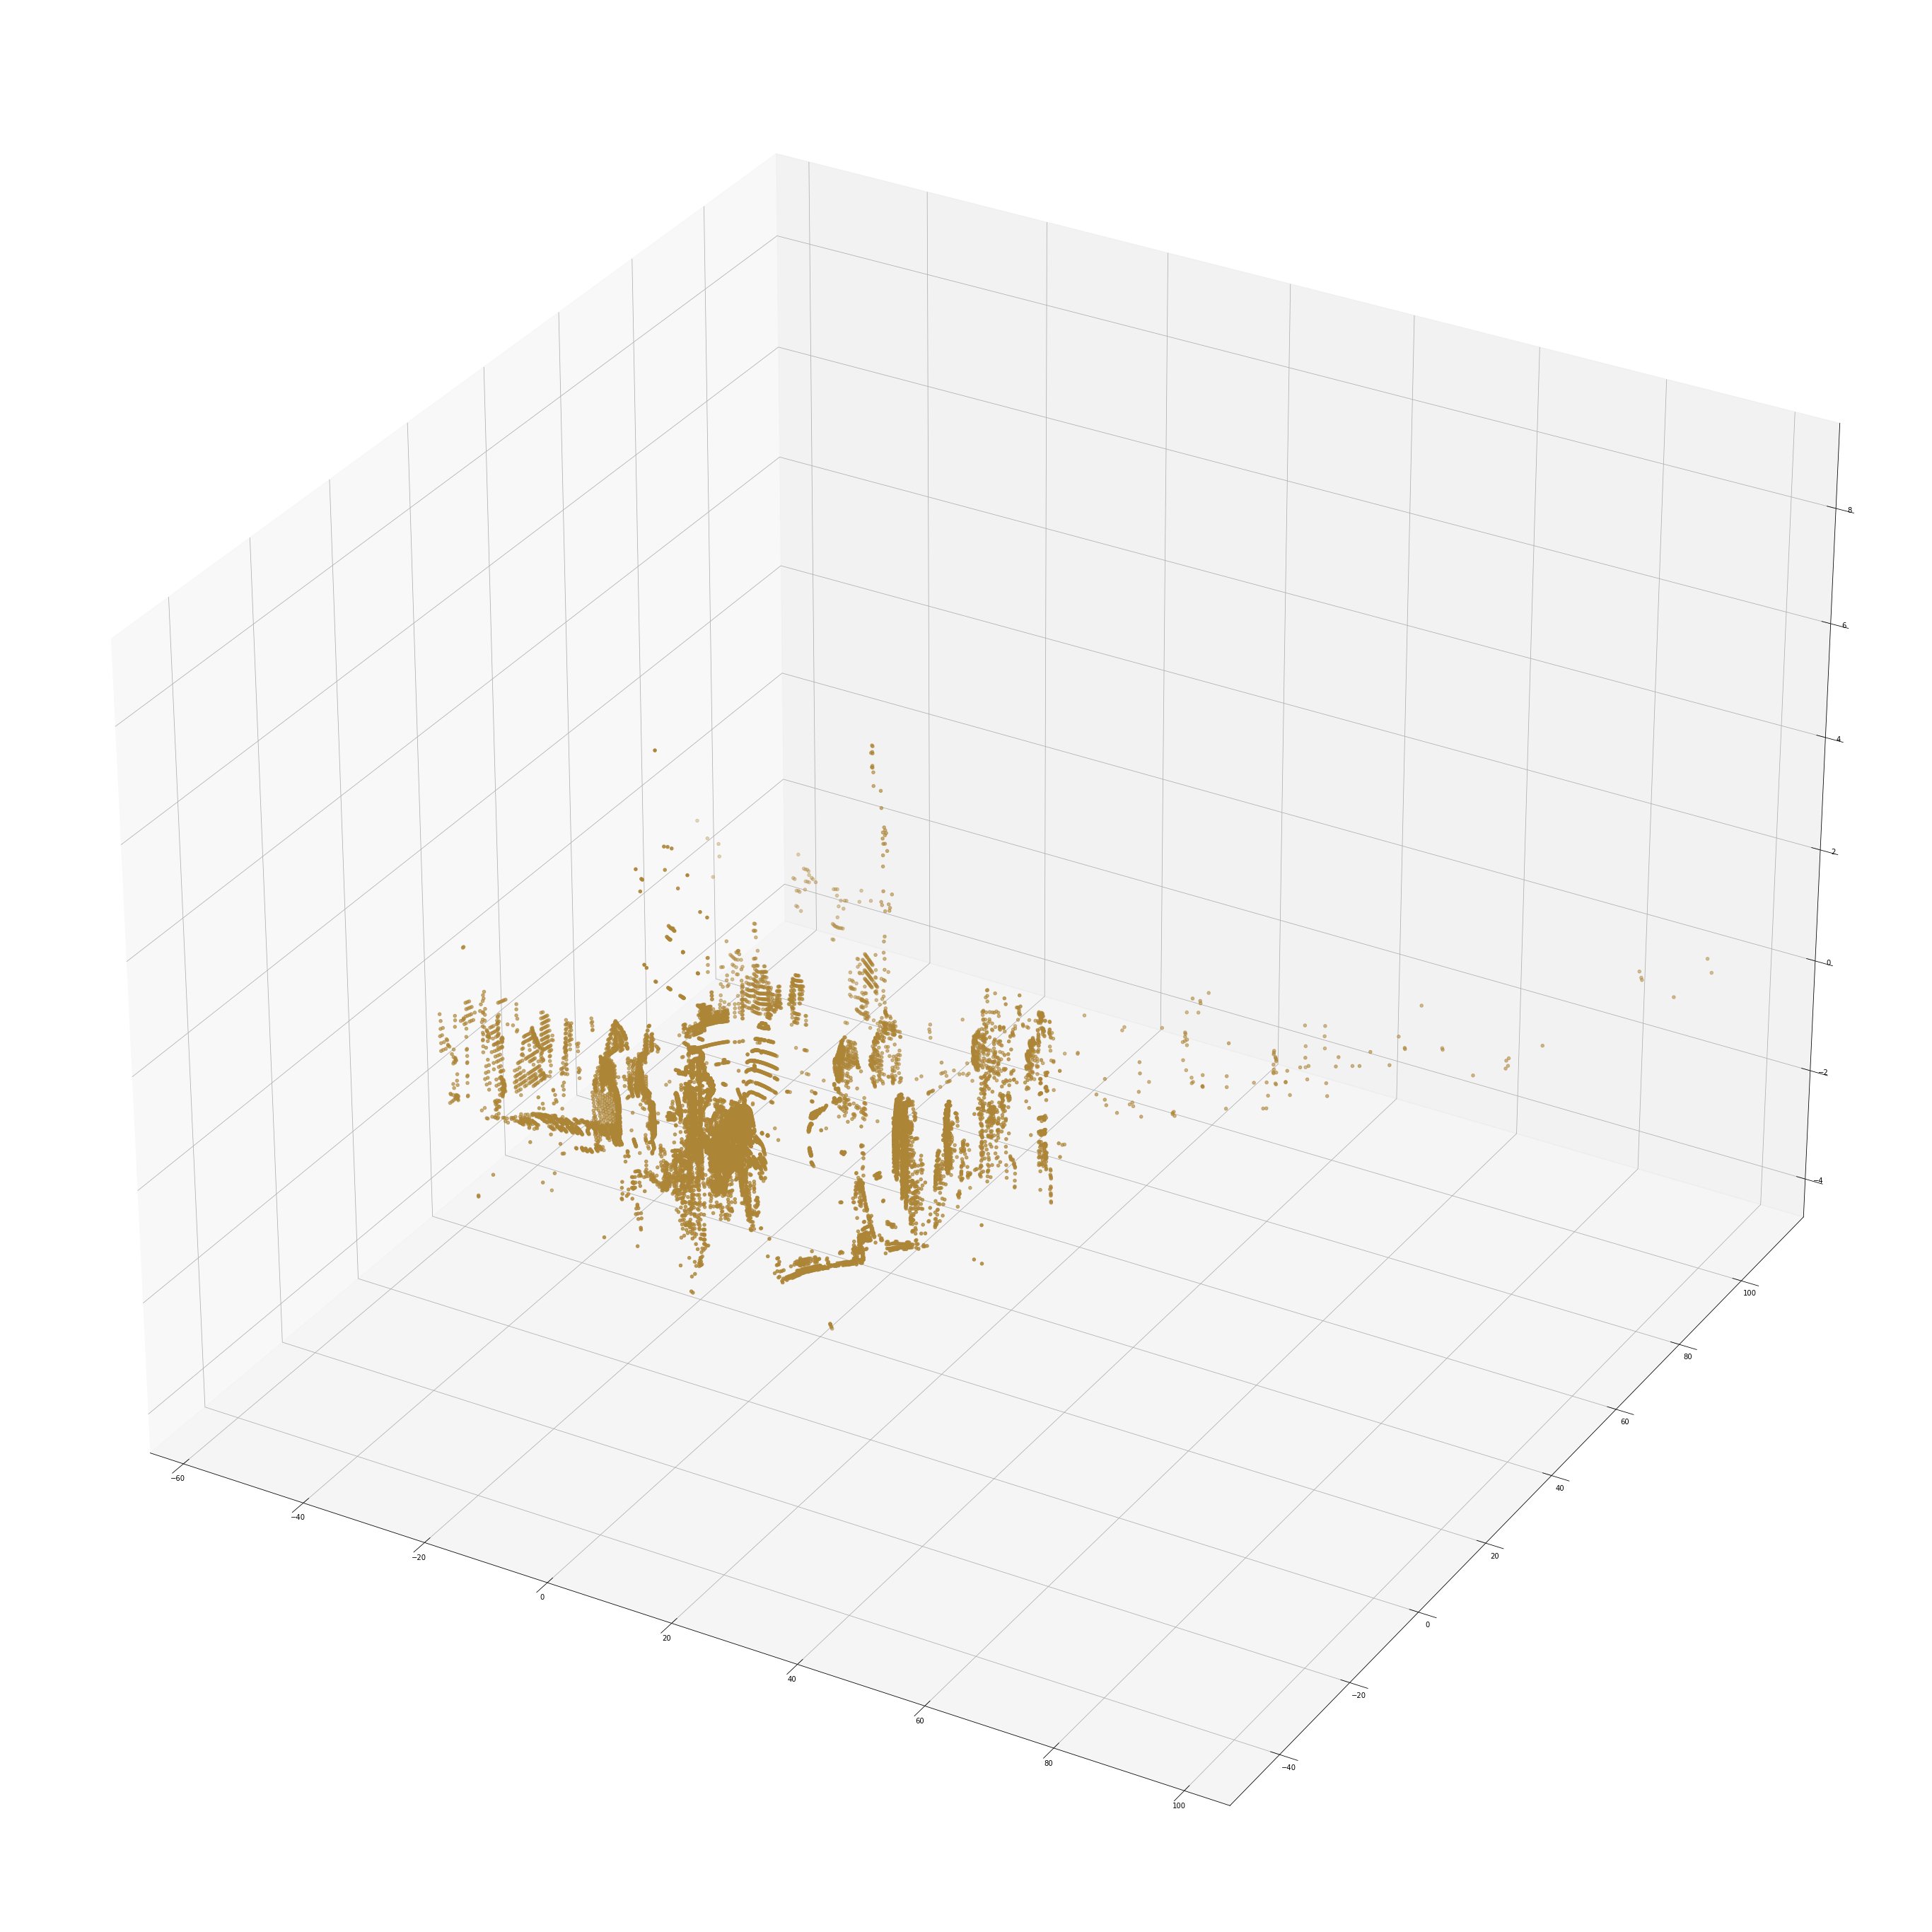

In [50]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

rgb = np.random.rand(3,)
fig = plt.figure(figsize=(50,50))
# ax = fig.add_subplot(111, projection='3d')

# for k in range (1,43):
x_sub =[]
y_sub =[]
z_sub =[]

for l in range (0,len(plotdata)):

        if 13 == plotdata['Class'][l]:
            x =  plotdata["x"][l]
            x_sub.append(x)
            y =  plotdata["y"][l]
            y_sub.append(y)
            z =  plotdata["z"][l]
            z_sub.append(z)
        
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_sub,y_sub,z_sub,c=[rgb])

plt.show()

In [51]:
grounp_number=[]
prediction = np.array(prediction)
for j in range (1, 43):
    account = 0
    for i in range (0,len(prediction)):
        a = j
        if a == prediction[i-1] and a == prediction[i-2] and a == prediction[i-3] and a == prediction[i-4] and a == prediction[i-5] and a == prediction[i-6] and a == prediction[i-7] and a == prediction[i-8] and a == prediction[i-9]:
            account+=1
    grounp_number.append(account)
    
result_grounp =[]
result_grounp = pd.DataFrame(result)
# categories = pd.DataFrame(categories)
grounp_number = pd.DataFrame(grounp_number)

result_grounp = pd.concat([categories, grounp_number],axis = 1, ignore_index=True)
result_grounp.columns =['Class', 'Number of groups']

print(result_grounp)

                                   Class  Number of groups
0                                  Smoke                 0
1                                Exhaust                 0
2                          Spray or rain                 0
3                             Reflection                 0
4                             Vegetation              4010
5                                 Ground                 0
6                                   Road             22178
7                      Lane Line Marking                 0
8                      Stop Line Marking                 0
9                     Other Road Marking                 0
10                              Sidewalk               174
11                              Driveway                 0
12                                   Car              1530
13                          Pickup Truck                 0
14                    Medium-sized Truck                 0
15                            Semi-truck                